# aSPEM Experiment : analysis




In [1]:
!ls data/

lup_0_2017-05-24_160243.npy  psychophysique_chloe_0_2017-05-31_165237.npy
lup_1_2017-05-24_160243.npy  psychophysique_chloe_1_2017-05-31_165237.npy


In [2]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline

from aSPEM import aSPEM
e = aSPEM()
p = e.params_protocol['p']
N_trials = e.params_protocol['N_trials']
N_blocks = e.params_protocol['N_blocks']
timeStr = '2017-05-31_165237'
observer = 'chloe'
mode = 'psychophysique'

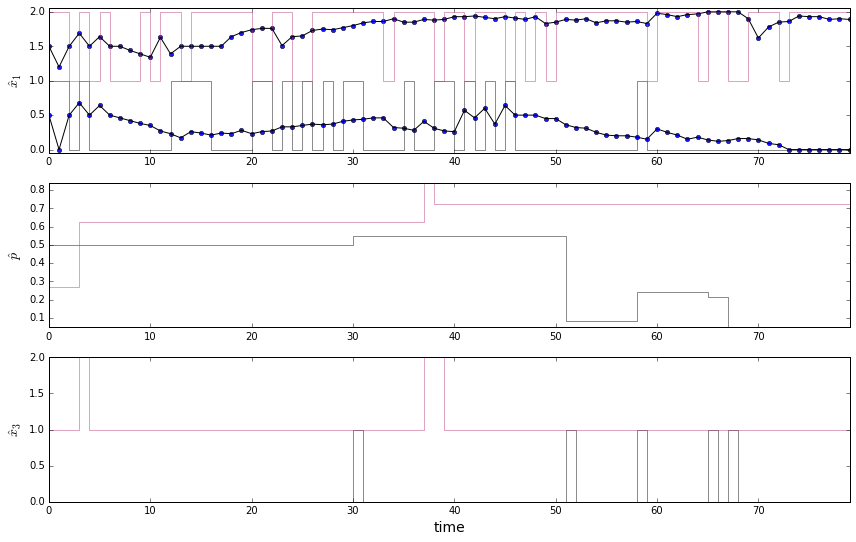

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/1.6180))
stick = np.zeros_like(p)
stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
corrects = 0

for i_layer, label in enumerate([r'$\^x_1$', r'$\^p$', r'$\^x_3$']):
    from cycler import cycler
    axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_blocks+1)]))
    _ = axs[i_layer].step(range(N_trials), p[:, :, i_layer]+stick[:, :, i_layer], lw=.5, alpha=.9)
    axs[i_layer].axis('tight')
    axs[i_layer].set_ylabel(label, fontsize=14)

for block in range(N_blocks):   
    results = e.load(observer, block=block, timeStr=timeStr, mode=mode)
    corrects += (results == p[:, block, 0]).sum()
    border = 0.15
    _ = axs[0].plot(range(N_trials), block + results, color='k')
    axs[0].scatter(range(N_trials), block + results, lw=.5, alpha=.9)

fig.tight_layout()
for i in range(1): axs[i].set_ylim(-.05, N_blocks + .05)
axs[-1].set_xlabel('time', fontsize=14);


In [4]:
print (corrects / N_trials / N_blocks *100, '%')

5.625 %
